In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model.forward(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3135, grad_fn=<NllLossBackward>)


In [3]:
images.view(images.shape[0], -1)

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [4]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model.forward(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3168, grad_fn=<NllLossBackward>)


In [5]:
x = torch.randn(2,2, requires_grad= True)
print(x)

tensor([[ 1.5133,  0.7694],
        [-1.0839,  0.2199]], requires_grad=True)


In [6]:
y=x**2
print(y)

tensor([[2.2899, 0.5920],
        [1.1749, 0.0484]], grad_fn=<PowBackward0>)


In [7]:
torch.randint(3, 5, (3,))

tensor([3, 3, 4])

In [8]:
print(y.grad_fn)

In [9]:
z=y.mean()
print(z)

tensor(1.0263, grad_fn=<MeanBackward0>)


In [10]:
print(x.grad)
print(y.grad)

None
None


In [11]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.7566,  0.3847],
        [-0.5420,  0.1100]])
tensor([[ 0.7566,  0.3847],
        [-0.5420,  0.1100]], grad_fn=<DivBackward0>)


## with loss

In [12]:
model = nn. Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits= model(images)
loss = criterion(logits, labels)

In [13]:
print('before backward pass: \n', model[0].weight.grad)
loss.backward()
print('after backward pass: \n', model[0].weight.grad)

before backward pass: 
 None
after backward pass: 
 tensor([[-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        ...,
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002]])


In [14]:
from torch import optim 

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
print('initial weights', model[0].weight)
imagse, labels= next(iter(trainloader))
images.resize_(64, 784)


#clearing the gradients 
optimizer.zero_grad()

#forward pass-> backward pass-> update weights
output = model.forward(images)
loss= criterion(output, labels)

loss.backward()
print('gradient ', model[0].weight.grad)

initial weights Parameter containing:
tensor([[-0.0040, -0.0283,  0.0109,  ..., -0.0199,  0.0230,  0.0109],
        [-0.0082,  0.0186,  0.0187,  ...,  0.0045, -0.0180, -0.0110],
        [-0.0095, -0.0167,  0.0326,  ...,  0.0017, -0.0172,  0.0044],
        ...,
        [-0.0066, -0.0308, -0.0186,  ...,  0.0165,  0.0070, -0.0268],
        [-0.0191, -0.0007,  0.0247,  ...,  0.0187,  0.0229, -0.0193],
        [-0.0128,  0.0061,  0.0048,  ..., -0.0283, -0.0338,  0.0156]],
       requires_grad=True)
gradient  tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009]])


In [16]:
optimizer.step()
print('update weights', model[0].weight)

update weights Parameter containing:
tensor([[-0.0040, -0.0283,  0.0109,  ..., -0.0199,  0.0230,  0.0109],
        [-0.0083,  0.0186,  0.0187,  ...,  0.0045, -0.0180, -0.0110],
        [-0.0095, -0.0167,  0.0326,  ...,  0.0017, -0.0172,  0.0044],
        ...,
        [-0.0066, -0.0308, -0.0186,  ...,  0.0165,  0.0070, -0.0268],
        [-0.0191, -0.0008,  0.0247,  ...,  0.0186,  0.0228, -0.0193],
        [-0.0128,  0.0061,  0.0048,  ..., -0.0283, -0.0338,  0.0156]],
       requires_grad=True)


In [22]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion= nn.NLLLoss()
optimizer= optim.SGD(model.parameters(), lr= 0.001)

#epochs
epoch= 5

for e in range(epoch):
    running_loss= 0 
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1) #flatten the images
        
        optimizer.zero_grad()
        
        output= model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"training loss {running_loss/len(trainloader)}")

training loss 2.231606663671384
training loss 1.9745478433078285
training loss 1.5365359851800557
training loss 1.106944273720418
training loss 0.8393701278070397


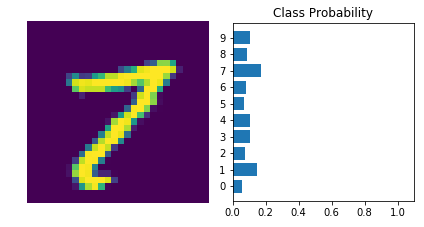

In [37]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1,784)

with torch.no_grad(): #tun off gradients 
    logps= model.forward(img)
    
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)